In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel("User_record.xlsx", engine="openpyxl")


### Gender & Age Distribution

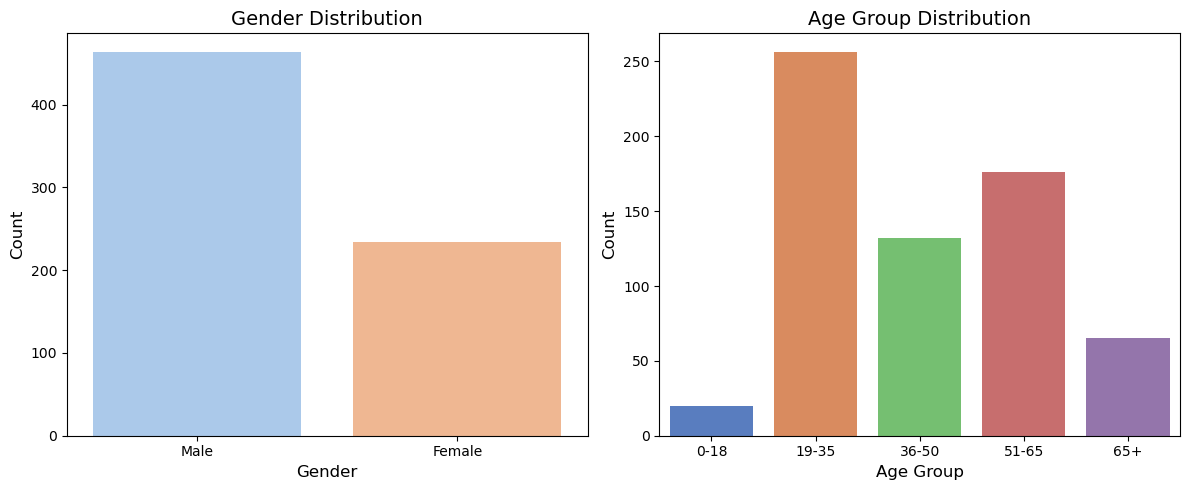

In [78]:

gender_counts = data['Gender'].value_counts()
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
age_group_counts = data['Age Group'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 2, 2)
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="muted")
plt.title('Age Group Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


### Income vs. Stress Level


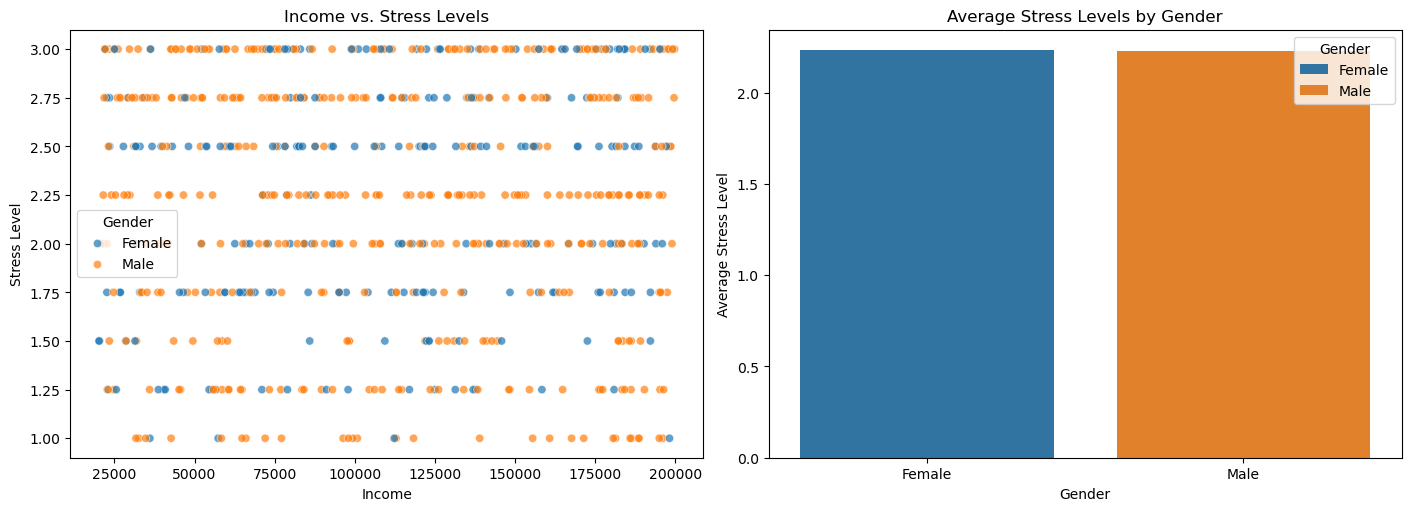

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

sns.scatterplot(ax=axes[0], x='Income', y='Stress ', data=data, hue='Gender', alpha=0.7)
axes[0].set_title('Income vs. Stress Levels')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Stress Level')

sns.barplot(ax=axes[1], x='Gender', y='Stress ', hue='Gender', data=data, estimator='mean', ci=None)
axes[1].set_title('Average Stress Levels by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Stress Level')

plt.show()

### Heatmap of Education prevalence

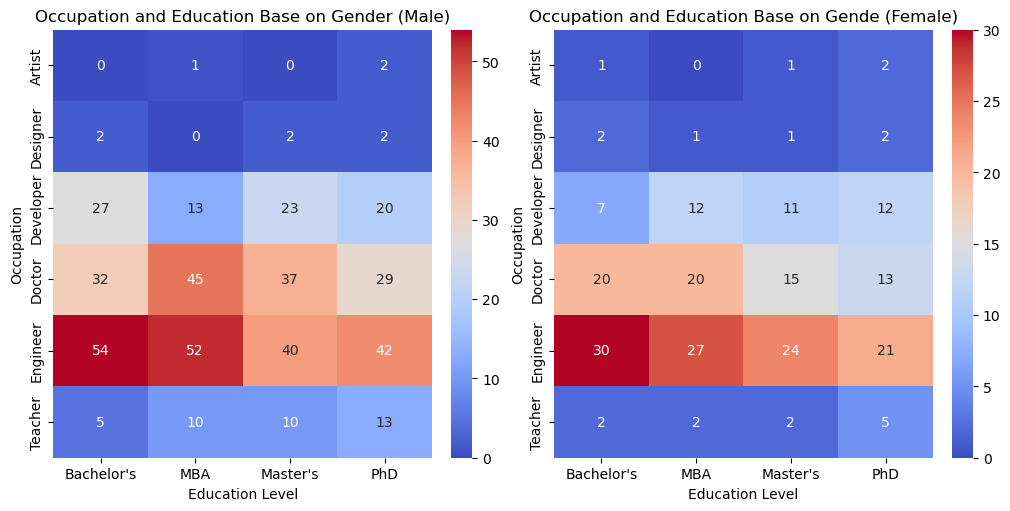

In [80]:

pivot_male = data[data['Gender'] == 'Male'].pivot_table(
    index='Occupation', columns='Education ', values='Gender', aggfunc='count', fill_value=0
)
pivot_female = data[data['Gender'] == 'Female'].pivot_table(
    index='Occupation', columns='Education ', values='Gender', aggfunc='count', fill_value=0
)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

sns.heatmap(pivot_male, annot=True, fmt='d', cmap='coolwarm', ax=axes[0])
axes[0].set_title('Occupation and Education Base on Gender (Male)')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Occupation')

sns.heatmap(pivot_female, annot=True, fmt='d', cmap='coolwarm', ax=axes[1])
axes[1].set_title('Occupation and Education Base on Gende (Female)')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Occupation')

plt.show()


### 'Marital' status and calculate the sum of 'Savings' for each category


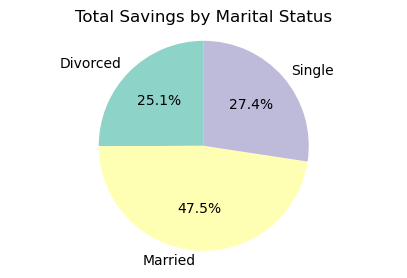

In [81]:

savings_by_marital = data.groupby('Marital ').agg({'Savings': 'sum'}).reset_index()
plt.figure(figsize=(5, 3))
plt.pie(savings_by_marital['Savings'], labels=savings_by_marital['Marital '], autopct='%1.1f%%',startangle=90, colors=sns.color_palette('Set3', len(savings_by_marital)))
plt.title('Total Savings by Marital Status')
plt.axis('equal')  
plt.show()


## Disease by Age Group

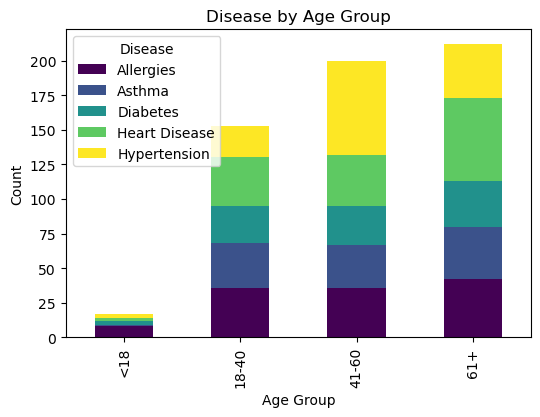

In [86]:

bins = [0, 18, 30, 50, 100]
labels = ["<18", "18-40", "41-60", "61+"]
data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels)

age_disease_distribution = data.groupby("Age Group")["Disease"].value_counts().unstack()

age_disease_distribution.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="viridis")
plt.title("Disease by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Disease")
plt.show()


## Violin Plot (Savings Distribution by Occupation)
See savings distribution for different occupations.

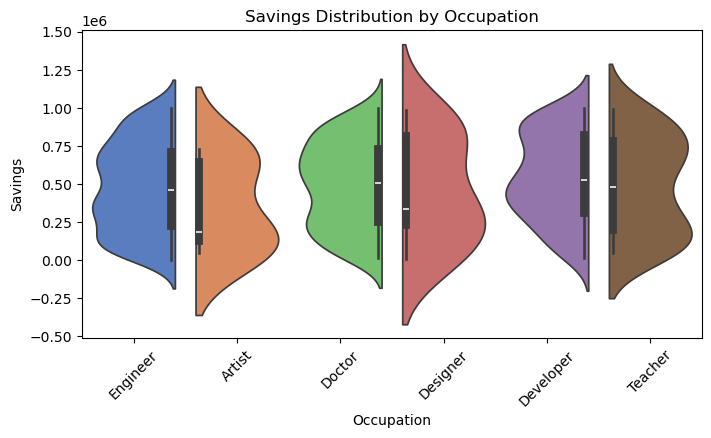

In [88]:
plt.figure(figsize=(8, 4))
sns.violinplot(x="Occupation", y="Savings", data=data,split=True, palette="muted")
plt.title("Savings Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Savings")
plt.xticks(rotation=45)
plt.show()


### Savings Potential by Sleep Patterns and Stress Levels

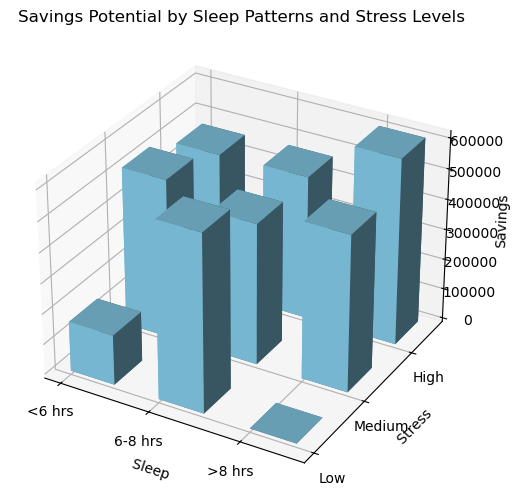

In [84]:
def categorize_sleep(sleep_hours):
    if sleep_hours < 6:
        return "<6 hrs"
    elif 6 <= sleep_hours <= 8:
        return "6-8 hrs"
    else:
        return ">8 hrs"

data['Sleep Category'] = data['Sleeping '].apply(categorize_sleep)

def categorize_stress(stress):
    if stress <= 1.75:
        return "Low"
    elif 1.76 <= stress <= 2.75:
        return "Medium"
    else:
        return "High"

data['Stress Category'] = data['Stress '].apply(categorize_stress)

savings_data = data.groupby(['Sleep Category', 'Stress Category']).agg({'Savings': 'mean'}).reset_index()

# Prepareing data for 3D plotting
sleep_categories = ["<6 hrs", "6-8 hrs", ">8 hrs"]
stress_categories = ["Low", "Medium", "High"]
savings_matrix = np.zeros((len(sleep_categories), len(stress_categories)))

for i, sleep_cat in enumerate(sleep_categories):
    for j, stress_cat in enumerate(stress_categories):
        value = savings_data[(savings_data['Sleep Category'] == sleep_cat) &
                             (savings_data['Stress Category'] == stress_cat)]['Savings']
        savings_matrix[i, j] = value if not value.empty else 0

# Plotting the 3D bar chart
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

_x = np.arange(len(sleep_categories))
_y = np.arange(len(stress_categories))
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

z = np.zeros_like(x)
dz = savings_matrix.ravel()

ax.bar3d(x, y, z, dx=0.5, dy=0.5, dz=dz, shade=True, color='skyblue')

ax.set_xticks(np.arange(len(sleep_categories)))
ax.set_xticklabels(sleep_categories)
ax.set_yticks(np.arange(len(stress_categories)))
ax.set_yticklabels(stress_categories)
ax.set_xlabel(' Sleep')
ax.set_ylabel(' Stress')
ax.set_zlabel( 'Savings')
ax.set_title('Savings Potential by Sleep Patterns and Stress Levels')

plt.show()

 My instructor's instructions. The presentation should include the following sections:

1. slide 1 Introduction
2. slide 2 Background
3. slide 3 Methodology
4. slide 4 Experiments (Mathematical implementation or others)
5. slide 5 Conclusion (issues with the model)
 
Here is the full update of my python project. i used Tkinter to take input in my dataset ( in tkinter i used some method)
those method  are:
1. store data,
2. search from dataset,
3. i can also Edit data by searching data ( i used phone number as inique id to find the specific data)
4. i used submit function, clear function, also used tkinter calander.
5. after submiting the data. data will store in dataaset & aslo genretae a qr-Code which will strore the data.
6. after taking the data i analysed them Using ( pandas, numpy, matplotlib, seaborn)
    here i did analysis of :
    a) Gender & Age Distribution  
    b) Income vs. Stress Level  
    c) Heatmap of Education prevalence   
    d) Marital' status and calculate the sum of 'Savings' for each category   
    e) Disease by Age Group  
    f) Violin Plot (Savings Distribution by Occupation) See savings distribution for different occupations.  
    g) Savings Potential by Sleep Patterns and Stress Levels 


store this update & now i will give code. then you have to prepare full presentation slide.

sotre this 

